# 라이브러리

In [1]:
import pandas as pd

from metpy.calc import wind_components, wind_direction
from metpy.units import units

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")  # 한글 맑은고딕 폰트 사용

# 종관기상관측(ASOS) 데이터 불러오기

In [2]:
df = pd.read_csv("../data/OBS_ASOS_MI_159_20220906.csv", encoding="cp949")
df["일시"] = pd.to_datetime(df["일시"])
df.index = df["일시"]
df.drop("일시", axis="columns", inplace=True)
df

,지점,지점명,기온(°C),기온 QC플래그,누적강수량(mm),풍향(deg),풍향 QC플래그,풍속(m/s),풍속 QC플래그,현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,습도(%),습도 QC플래그,일사(MJ/m^2),일조(Sec)
일시,,,,,,,,,,,,,,,,,
2022-09-06 00:01:00,159,부산,25.4,0,0.1,92.2,0,7.8,0,986.4,0,994.2,0,96.3,0,0.00,0
2022-09-06 00:02:00,159,부산,25.4,0,0.2,90.7,0,7.9,0,986.3,0,994.1,0,96.7,0,0.00,0
2022-09-06 00:03:00,159,부산,25.4,0,0.4,97.1,0,7.5,0,986.3,0,994.1,0,96.3,0,0.00,0
2022-09-06 00:04:00,159,부산,25.4,0,0.5,98.4,0,6.1,0,986.1,0,993.9,0,97.0,0,0.00,0
2022-09-06 00:05:00,159,부산,25.4,0,0.6,86.8,0,8.3,0,986.1,0,993.9,0,97.1,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06 23:56:00,159,부산,21.4,0,69.2,274.7,0,2.7,0,1004.3,0,1012.3,0,74.1,0,17.81,22020
2022-09-06 23:57:00,159,부산,21.4,0,69.2,277.0,0,2.7,0,1004.3,0,1012.3,0,73.9,0,17.81,22020
2022-09-06 23:58:00,159,부산,21.4,0,69.2,294.8,0,2.0,0,1004.3,0,1012.3,0,74.8,0,17.81,22020


# 1시간 단위로 평균 또는 합계

## 풍속, 기압 : 평균

In [3]:
df["풍속(m/s)"]

일시
2022-09-06 00:01:00    7.8
2022-09-06 00:02:00    7.9
2022-09-06 00:03:00    7.5
2022-09-06 00:04:00    6.1
2022-09-06 00:05:00    8.3
                      ... 
2022-09-06 23:56:00    2.7
2022-09-06 23:57:00    2.7
2022-09-06 23:58:00    2.0
2022-09-06 23:59:00    2.1
2022-09-07 00:00:00    2.3
Name: 풍속(m/s), Length: 1440, dtype: float64

In [4]:
df["풍속(m/s)"].resample("1H").mean()

일시
2022-09-06 00:00:00     7.144068
2022-09-06 01:00:00     7.111667
2022-09-06 02:00:00     8.135000
2022-09-06 03:00:00     8.768333
2022-09-06 04:00:00    10.950000
2022-09-06 05:00:00     8.860000
2022-09-06 06:00:00    12.696667
2022-09-06 07:00:00    10.610000
2022-09-06 08:00:00     9.498333
2022-09-06 09:00:00     4.521667
2022-09-06 10:00:00     7.561667
2022-09-06 11:00:00     3.300000
2022-09-06 12:00:00     3.665000
2022-09-06 13:00:00     4.225000
2022-09-06 14:00:00     4.613333
2022-09-06 15:00:00     2.975000
2022-09-06 16:00:00     2.930000
2022-09-06 17:00:00     2.730000
2022-09-06 18:00:00     1.900000
2022-09-06 19:00:00     1.460000
2022-09-06 20:00:00     1.235000
2022-09-06 21:00:00     0.681667
2022-09-06 22:00:00     1.790000
2022-09-06 23:00:00     2.166667
2022-09-07 00:00:00     2.300000
Freq: H, Name: 풍속(m/s), dtype: float64

In [5]:
hourly_df = df[["풍속(m/s)", "현지기압(hPa)"]].resample("1H").mean()
hourly_df

,풍속(m/s),현지기압(hPa)
일시,,
2022-09-06 00:00:00,7.144068,985.132203
2022-09-06 01:00:00,7.111667,982.106667
2022-09-06 02:00:00,8.135000,978.480000
2022-09-06 03:00:00,8.768333,973.886667
2022-09-06 04:00:00,10.950000,968.403333
2022-09-06 05:00:00,8.860000,957.048333
2022-09-06 06:00:00,12.696667,964.395000
2022-09-06 07:00:00,10.610000,976.978333
2022-09-06 08:00:00,9.498333,983.315000


## 누적강수량 : 차분

In [6]:
df["누적강수량(mm)"]

일시
2022-09-06 00:01:00     0.1
2022-09-06 00:02:00     0.2
2022-09-06 00:03:00     0.4
2022-09-06 00:04:00     0.5
2022-09-06 00:05:00     0.6
                       ... 
2022-09-06 23:56:00    69.2
2022-09-06 23:57:00    69.2
2022-09-06 23:58:00    69.2
2022-09-06 23:59:00    69.2
2022-09-07 00:00:00    69.2
Name: 누적강수량(mm), Length: 1440, dtype: float64

In [7]:
hourly_df["강수량(mm)"] = df["누적강수량(mm)"].resample("1H").apply(lambda x: max(x)-min(x))
hourly_df

,풍속(m/s),현지기압(hPa),강수량(mm)
일시,,,
2022-09-06 00:00:00,7.144068,985.132203,1.2
2022-09-06 01:00:00,7.111667,982.106667,2.4
2022-09-06 02:00:00,8.135000,978.480000,4.7
2022-09-06 03:00:00,8.768333,973.886667,13.0
2022-09-06 04:00:00,10.950000,968.403333,32.4
2022-09-06 05:00:00,8.860000,957.048333,12.7
2022-09-06 06:00:00,12.696667,964.395000,1.8
2022-09-06 07:00:00,10.610000,976.978333,0.0
2022-09-06 08:00:00,9.498333,983.315000,0.0


## 풍향 : MetPy 의 활용

In [8]:
u, v = wind_components(df["풍속(m/s)"].values*units.meter_per_second, df["풍향(deg)"].values*units.deg)
u

Magnitude,[-7.7942507480028445 -7.899410420317571 -7.442489534141166 ... 1.815554957065817 1.8938483054507387 2.2697681477356566]
Units,meter_per_second


In [9]:
df["U(m/s)"] = u.magnitude
df["V(m/s)"] = v.magnitude
df

,지점,지점명,기온(°C),기온 QC플래그,누적강수량(mm),풍향(deg),풍향 QC플래그,풍속(m/s),풍속 QC플래그,현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,습도(%),습도 QC플래그,일사(MJ/m^2),일조(Sec),U(m/s),V(m/s)
일시,,,,,,,,,,,,,,,,,,,
2022-09-06 00:01:00,159,부산,25.4,0,0.1,92.2,0,7.8,0,986.4,0,994.2,0,96.3,0,0.00,0,-7.794251,0.299425
2022-09-06 00:02:00,159,부산,25.4,0,0.2,90.7,0,7.9,0,986.3,0,994.1,0,96.7,0,0.00,0,-7.899410,0.096514
2022-09-06 00:03:00,159,부산,25.4,0,0.4,97.1,0,7.5,0,986.3,0,994.1,0,96.3,0,0.00,0,-7.442490,0.927011
2022-09-06 00:04:00,159,부산,25.4,0,0.5,98.4,0,6.1,0,986.1,0,993.9,0,97.0,0,0.00,0,-6.034561,0.891106
2022-09-06 00:05:00,159,부산,25.4,0,0.6,86.8,0,8.3,0,986.1,0,993.9,0,97.1,0,0.00,0,-8.287058,-0.463318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06 23:56:00,159,부산,21.4,0,69.2,274.7,0,2.7,0,1004.3,0,1012.3,0,74.1,0,17.81,22020,2.690921,-0.221234
2022-09-06 23:57:00,159,부산,21.4,0,69.2,277.0,0,2.7,0,1004.3,0,1012.3,0,73.9,0,17.81,22020,2.679875,-0.329047
2022-09-06 23:58:00,159,부산,21.4,0,69.2,294.8,0,2.0,0,1004.3,0,1012.3,0,74.8,0,17.81,22020,1.815555,-0.838904


In [10]:
hourly_uv = df[["U(m/s)", "V(m/s)"]].resample("1H").mean()
hourly_uv

,U(m/s),V(m/s)
일시,,
2022-09-06 00:00:00,-6.985744,0.832151
2022-09-06 01:00:00,-6.999320,0.903526
2022-09-06 02:00:00,-7.929083,1.409652
2022-09-06 03:00:00,-8.409913,2.099278
2022-09-06 04:00:00,-10.087236,4.026491
2022-09-06 05:00:00,-5.267655,0.820443
2022-09-06 06:00:00,12.486455,-0.064795
2022-09-06 07:00:00,10.367614,-0.460695
2022-09-06 08:00:00,8.795670,-0.341459


In [11]:
hourly_wd = wind_direction(hourly_uv["U(m/s)"].values*units.meter_per_second, hourly_uv["V(m/s)"].values*units.meter_per_second)
hourly_wd

Magnitude,[96.79314097122247 97.35550458445235 100.08085645574613 104.01572415853192 111.7602503957888 98.85274684622956 270.29731886984104 272.5443208710727 272.22317951655555 180.3013292638751 302.1092567100285 294.5748300310567 265.14295476111715 230.56811528035823 190.38850493149766 255.83927104922992 282.46147621363644 278.9407326301658 298.6812093832143 321.54084414725924 297.3445872911386 271.12328657566263 301.14511463032227 294.18888053772787 279.3]
Units,degree


In [12]:
hourly_df["풍향(deg)"] = hourly_wd.magnitude
hourly_df

,풍속(m/s),현지기압(hPa),강수량(mm),풍향(deg)
일시,,,,
2022-09-06 00:00:00,7.144068,985.132203,1.2,96.793141
2022-09-06 01:00:00,7.111667,982.106667,2.4,97.355505
2022-09-06 02:00:00,8.135000,978.480000,4.7,100.080856
2022-09-06 03:00:00,8.768333,973.886667,13.0,104.015724
2022-09-06 04:00:00,10.950000,968.403333,32.4,111.760250
2022-09-06 05:00:00,8.860000,957.048333,12.7,98.852747
2022-09-06 06:00:00,12.696667,964.395000,1.8,270.297319
2022-09-06 07:00:00,10.610000,976.978333,0.0,272.544321
2022-09-06 08:00:00,9.498333,983.315000,0.0,272.223180


# 풍속 & 기압 그래프

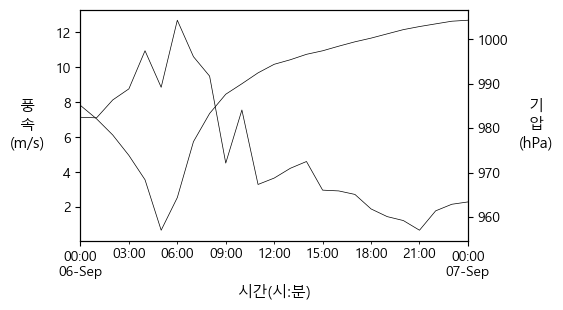

In [13]:
plot = hourly_df["풍속(m/s)"].plot(c="k", lw=0.5, figsize=(5, 3))
plot.set_xlabel("시간(시:분)", fontsize=11)
plot.set_ylabel("풍\n속\n(m/s)", fontsize=11, rotation=0, va="center", labelpad=20)

twin_plot = plot.twinx()
hourly_df["현지기압(hPa)"].plot(c="k", lw=0.5, ax=twin_plot)
twin_plot.set_ylabel("기\n압\n(hPa)", fontsize=11, rotation=0, va="center", labelpad=20)

plt.show()

## 선 스타일 변경

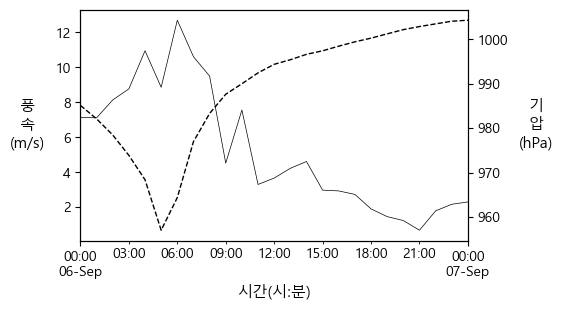

In [14]:
plot = hourly_df["풍속(m/s)"].plot(c="k", lw=0.5, figsize=(5, 3))
plot.set_xlabel("시간(시:분)", fontsize=11)
plot.set_ylabel("풍\n속\n(m/s)", fontsize=11, rotation=0, va="center", labelpad=20)

twin_plot = plot.twinx()
hourly_df["현지기압(hPa)"].plot(c="k", lw=1, ls="--", ax=twin_plot)  # ls (linestyle)
twin_plot.set_ylabel("기\n압\n(hPa)", fontsize=11, rotation=0, va="center", labelpad=20)

plt.show()

# 풍향 그래프 추가

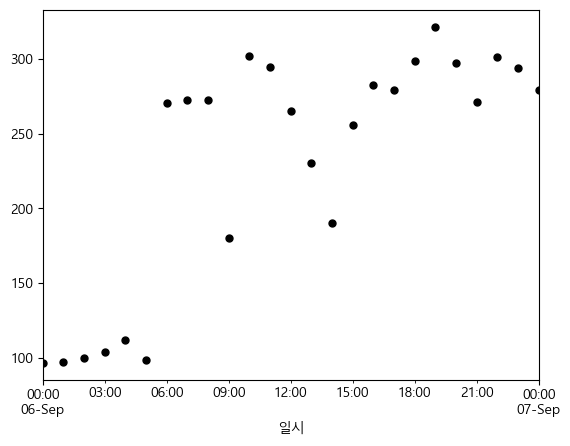

In [15]:
hourly_df["풍향(deg)"].plot(c="k", lw=0, marker="o", ms=5)
plt.show()

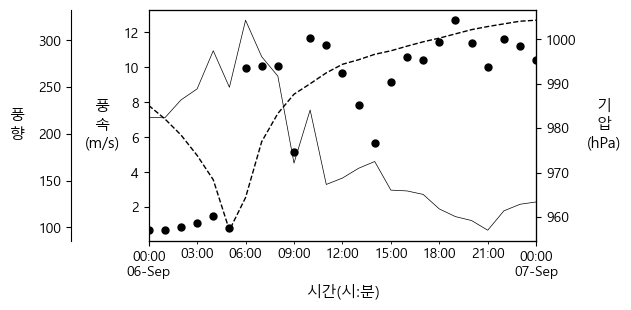

In [16]:
plot = hourly_df["풍속(m/s)"].plot(c="k", lw=0.5, figsize=(5, 3))
plot.set_xlabel("시간(시:분)", fontsize=11)
plot.set_ylabel("풍\n속\n(m/s)", fontsize=11, rotation=0, va="center", labelpad=15)

twin_plot1 = plot.twinx()
hourly_df["현지기압(hPa)"].plot(c="k", lw=1, ls="--", ax=twin_plot1)  # ls (linestyle)
twin_plot1.set_ylabel("기\n압\n(hPa)", fontsize=11, rotation=0, va="center", labelpad=20)
# 풍향 그래프 추가
twin_plot2 = plot.twinx()
twin_plot2.spines.left.set_position(("axes", -0.2))
twin_plot2.yaxis.set_label_position('left')
twin_plot2.yaxis.set_ticks_position('left')
hourly_df["풍향(deg)"].plot(c="k", lw=0, marker="o", ms=5, ax=twin_plot2)
twin_plot2.set_ylabel("풍\n향", fontsize=11, rotation=0, va="center", labelpad=15)

plt.show()

## Y축 틱 값

In [17]:
twin_plot2.set_yticks([0, 90, 180, 270, 360])
twin_plot2.set_yticklabels(["N", "E", "S", "W", "N"])

[Text(0, 0, 'N'),
 Text(0, 90, 'E'),
 Text(0, 180, 'S'),
 Text(0, 270, 'W'),
 Text(0, 360, 'N')]

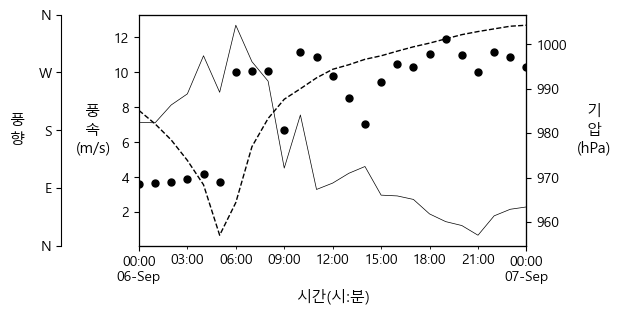

In [33]:
plot = hourly_df["풍속(m/s)"].plot(c="k", lw=0.5, figsize=(5, 3))
plot.set_xlabel("시간(시:분)", fontsize=11)
plot.set_ylabel("풍\n속\n(m/s)", fontsize=11, rotation=0, va="center", labelpad=15)

twin_plot1 = plot.twinx()
hourly_df["현지기압(hPa)"].plot(c="k", lw=1, ls="--", ax=twin_plot1)  # ls (linestyle)
twin_plot1.set_ylabel("기\n압\n(hPa)", fontsize=11, rotation=0, va="center", labelpad=20)

twin_plot2 = plot.twinx()
twin_plot2.spines.left.set_position(("axes", -0.2))
twin_plot2.yaxis.set_label_position('left')
twin_plot2.yaxis.set_ticks_position('left')
hourly_df["풍향(deg)"].plot(c="k", lw=0, marker="o", ms=5, ax=twin_plot2)
twin_plot2.set_ylabel("풍\n향", fontsize=11, rotation=0, va="center", labelpad=15)
twin_plot2.set_yticks([0, 90, 180, 270, 360])
twin_plot2.set_yticklabels(["N", "E", "S", "W", "N"])

plt.savefig("힌남노_시간_풍속_풍향_기압_그래프.png", bbox_inches="tight")
plt.show()

# 강수량 막대그래프 추가

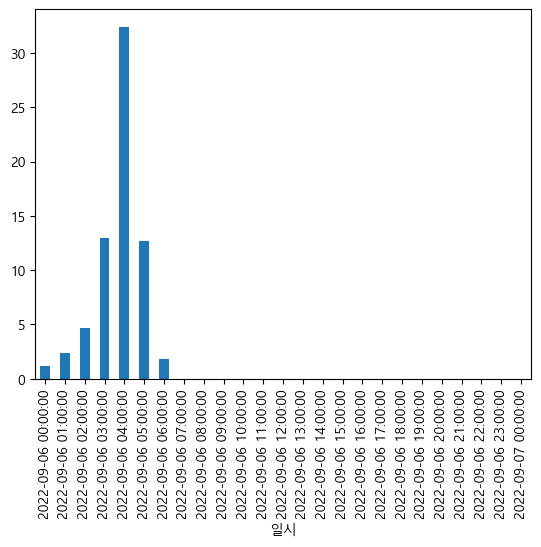

In [26]:
hourly_df["강수량(mm)"].plot(kind="bar")
plt.show()

## 막대 스타일

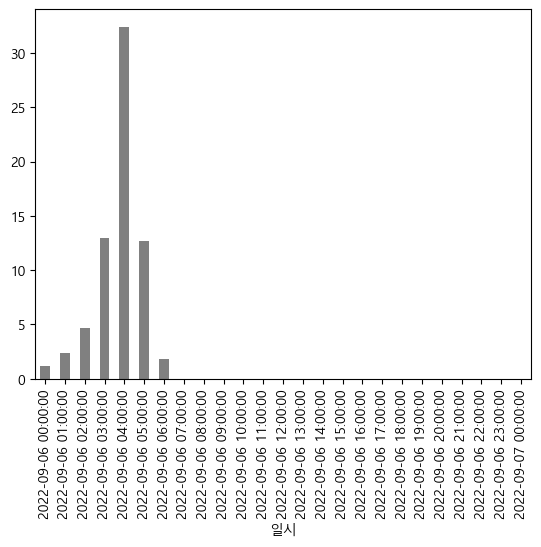

In [27]:
hourly_df["강수량(mm)"].plot(kind="bar", fc="grey")  # fc (facecolor)
plt.show()

## 서브플롯

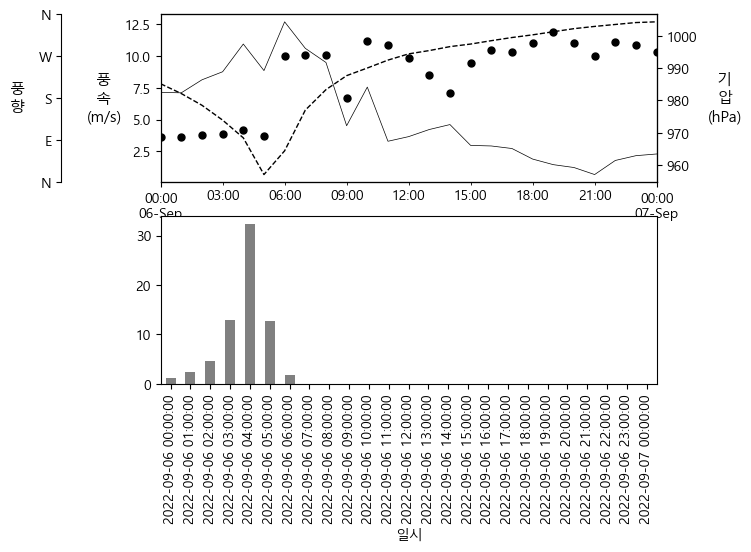

In [32]:
figure, subplots = plt.subplots(nrows=2)

plot = hourly_df["풍속(m/s)"].plot(c="k", lw=0.5, ax=subplots[0])
plot.set_xlabel("시간(시:분)", fontsize=11)
plot.set_ylabel("풍\n속\n(m/s)", fontsize=11, rotation=0, va="center", labelpad=15)

twin_plot1 = plot.twinx()
hourly_df["현지기압(hPa)"].plot(c="k", lw=1, ls="--", ax=twin_plot1)  # ls (linestyle)
twin_plot1.set_ylabel("기\n압\n(hPa)", fontsize=11, rotation=0, va="center", labelpad=20)

twin_plot2 = plot.twinx()
twin_plot2.spines.left.set_position(("axes", -0.2))
twin_plot2.yaxis.set_label_position('left')
twin_plot2.yaxis.set_ticks_position('left')
hourly_df["풍향(deg)"].plot(c="k", lw=0, marker="o", ms=5, ax=twin_plot2)
twin_plot2.set_ylabel("풍\n향", fontsize=11, rotation=0, va="center", labelpad=15)
twin_plot2.set_yticks([0, 90, 180, 270, 360])
twin_plot2.set_yticklabels(["N", "E", "S", "W", "N"])

hourly_df["강수량(mm)"].plot(kind="bar", fc="grey", ax=subplots[1])

plt.show()